In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

from scipy.stats import randint
import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn import metrics

# Data management

### 1)

In [2]:
df_test = pd.read_csv("evaluation.csv", delimiter=',')
df_train = pd.read_csv("train.csv", delimiter=',')
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [3]:
df_train.shape

(6338, 21)

In [4]:
# Checking the data types of all the columns
df_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Text(0.5, 1.0, '% of Churn')

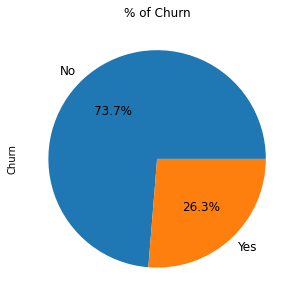

In [5]:
ax = (df_train['Churn'].value_counts()*100.0 /len(df_train))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_title('% of Churn', fontsize = 12)

In [6]:
df_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,6338,6338,3824-RHKVR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,6338,2,Male,3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,6338,NaN,NaN,NaN,0.160461,0.367062,0,0,0,0,1
Partner,6338,2,No,3264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,6338,2,No,4437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,6338,NaN,NaN,NaN,32.4359,24.5045,0,9,29,55,72
PhoneService,6338,2,Yes,5726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,6338,3,No,3043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,6338,3,Fiber optic,2798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,6338,3,No,3148,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2)

In [7]:
# Check for duplicate values
duplicateRowsDF = df_train[df_train.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [8]:
# Converting Total Charges to a numerical data type.
df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges, errors='coerce')
df_train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Removing missing values 
df_train.dropna(inplace = True)
# Remove customer IDs from the data set
df_train = df_train.iloc[:,1:]
df_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
6334,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
6335,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
6336,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 3)

In [10]:
# Convert the predictor variable in a binary numeric variable
df_train['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_train['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Convert all the categorical variables into dummy variables
df_train_dummies = pd.get_dummies(df_train)
df_train_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,8,99.65,820.50,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0


# Exploration des données

### 1)

<AxesSubplot:>

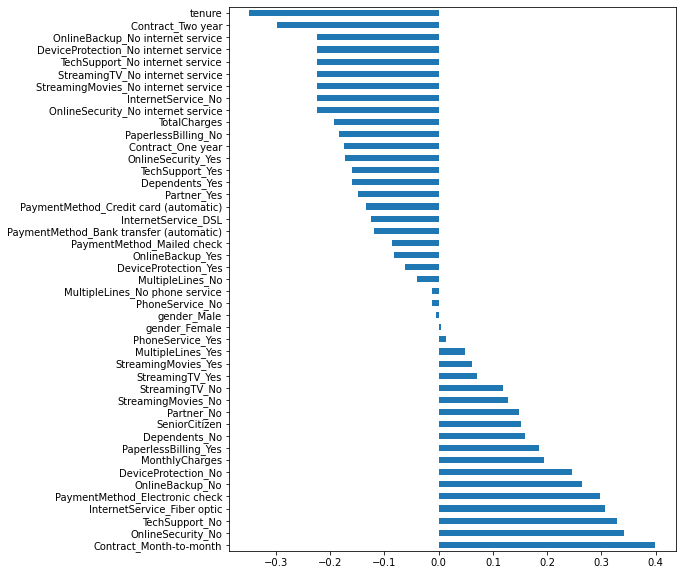

In [11]:
# Correlation matrix
df_correlations = df_train_dummies.corr()

# Correlation rate graph
plt.figure(figsize=(8,10))
(df_correlations
     .Churn
     .drop('Churn') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [12]:
"""
Nous avons ici un graph représentant nos taux de corrélation par rapport à notre variable 'Churn'. On remarque rapidement que nous avons des corrélation positive et négative.
On sait que plus la corrélation est élevé (proche de 1) et plus elle expliquera nos variables, c'est-à-dire qu'elle à un gros impact par rapport à notre variable cible.
Attention, il faut aussi regarder nos variables avec un taux négatif puisqu'elles seront tout simplement inversement corrélées (plus elle seront proche de -1 et plus elles
seront inversement corrélées).

On voit rapidement que les contrats mensuels représente notre variable avec le taux de corrélation le plus élevé, la Tenure (Nombre de mois pendant lesquels le client est 
resté abonné avec l'entreprise) est fortement inversement corrélé, et par exemple le genre n'est pas du tout corrélé.
On sait de plus que le Churn représente notre variable cible avec le schéma suivant : Yes = le client s’est désabonné de l’entreprise, Non : le client est resté abonné dans
l’entreprise.
Ainsi, plus les variables, comme Contract_Month-to-month, OnlineSecurity_No, TechSupport_No, etc..., ont un taux de corrélation élevé et plus on peut dire que ces dernières
explique pourquoi les clients se sont désabonnés. Celà est applicable aux variables inversement corrélées aussi.
"""

"\nNous avons ici un graph représentant nos taux de corrélation par rapport à notre variable 'Churn'. On remarque rapidement que nous avons des corrélation positive et négative.\nOn sait que plus la corrélation est élevé (proche de 1) et plus elle expliquera nos variables, c'est-à-dire qu'elle à un gros impact par rapport à notre variable cible.\nAttention, il faut aussi regarder nos variables avec un taux négatif puisqu'elles seront tout simplement inversement corrélées (plus elle seront proche de -1 et plus elles\nseront inversement corrélées).\n\nOn voit rapidement que les contrats mensuels représente notre variable avec le taux de corrélation le plus élevé, la Tenure (Nombre de mois pendant lesquels le client est \nresté abonné avec l'entreprise) est fortement inversement corrélé, et par exemple le genre n'est pas du tout corrélé.\nOn sait de plus que le Churn représente notre variable cible avec le schéma suivant : Yes = le client s’est désabonné de l’entreprise, Non : le client e

# Modélisation

### 1)

In [13]:
# We will use the data frame where we had created dummy variables
y = df_train_dummies['Churn'].values
X = df_train_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

### 2)

In [14]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 3.a)

In [15]:
"""
Nous avons préféré prendre des 'n_iter' égaux à 25 par soucis de temps de lancement des algorithmes.
"""

"\nNous avons préféré prendre des 'n_iter' égaux à 25 par soucis de temps de lancement des algorithmes.\n"

In [16]:
def print_score(predict, y_test):
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, predict)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, predict)))   
        print("AUC : \n {}\n".format(roc_auc_score(y_test, predict)))    

In [17]:
# Parameters distribution
param_distribs_rf = {
        'n_estimators': randint(low=200, high=1000),
        'max_features': randint(low=1, high=8),
        'max_depth': randint(low=3, high=8),
        "min_samples_split": randint(low=5, high=10),
        "min_samples_leaf": randint(low=3, high=6),
        "bootstrap": [True],
        "criterion": ["gini"]
    }

rf_clf = RandomForestClassifier(random_state=42)
RS_rf = RandomizedSearchCV(rf_clf, param_distributions=param_distribs_rf,
                                n_iter=25, cv=5, scoring='accuracy', random_state=42, verbose = 1, n_jobs=-1)

RS_rf.fit(X_train, y_train)

print("Best parameters {}".format(RS_rf.best_params_))
print("Best score {:.4f}".format(RS_rf.best_score_))

pred_rf = RS_rf.best_estimator_.predict(X_test)
print_score(pred_rf, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 232}
Best score 0.8031
Test Result:

accuracy score: 0.8031

Confusion Matrix: 
 [[1285  135]
 [ 239  240]]

AUC : 
 0.7029867094004528



### 3.b)

In [18]:
# Parameters distribution
param_distribs_xgb = {"max_depth":  [2,4,8],
              "learning_rate":  [0.25, 0.1, 0.05, 0.01],
              "reg_alpha": np.linspace(0.5, 5,3 ),
              "reg_lambda": np.linspace(0.5, 5,3),
              "gamma": np.linspace(0.5, 5,3),
              "n_estimators" :randint(low=200, high=1000)}

xgb_clf = xgb.XGBClassifier()
RS_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_distribs_xgb,
                                n_iter=25, cv=5, scoring='accuracy', random_state=42,verbose = 1, n_jobs=-1)

RS_xgb.fit(X_train, y_train)

print("Best parameters {}".format(RS_xgb.best_params_))
print("Best score {:.4f}".format(RS_xgb.best_score_))

pred_xgb = RS_xgb.best_estimator_.predict(X_test)
print_score(pred_xgb, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Fadi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters {'gamma': 5.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 755, 'reg_alpha': 2.75, 'reg_lambda': 2.75}
Best score 0.8024
Test Result:

accuracy score: 0.8099

Confusion Matrix: 
 [[1282  138]
 [ 223  256]]

AUC : 
 0.7186318327501543



C:\Users\Fadi\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### 3.c)

In [19]:
seed = 42
np.random.seed(seed)

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

input_shape = X_train.shape[1]

In [21]:
model = Sequential()
model.add(Dense(32, input_dim=input_shape, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train,
              epochs=25,
          batch_size=24, class_weight={0:0.2, 1:0.8})

Epoch 1/25
185/185 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.5141
Epoch 2/25
185/185 [==============================] - 0s 951us/step - loss: 0.1866 - accuracy: 0.7023
Epoch 3/25
185/185 [==============================] - 0s 929us/step - loss: 0.1791 - accuracy: 0.7009
Epoch 4/25
185/185 [==============================] - 0s 902us/step - loss: 0.1772 - accuracy: 0.6897
Epoch 5/25
185/185 [==============================] - 0s 875us/step - loss: 0.1836 - accuracy: 0.6882
Epoch 6/25
185/185 [==============================] - 0s 875us/step - loss: 0.1784 - accuracy: 0.6854
Epoch 7/25
185/185 [==============================] - 0s 837us/step - loss: 0.1787 - accuracy: 0.6897
Epoch 8/25
185/185 [==============================] - 0s 864us/step - loss: 0.1783 - accuracy: 0.6852
Epoch 9/25
185/185 [==============================] - 0s 804us/step - loss: 0.1780 - accuracy: 0.7081
Epoch 10/25
185/185 [==============================] - 0s 810us/step - loss: 0.1771 

In [22]:
score = model.evaluate(X_test, y_test, batch_size=20)

95/95 [==============================] - 0s 415us/step - loss: 0.5943 - accuracy: 0.6767


In [23]:
print(score)
print ("Accuracy : %s" % "{0:.3%}".format(score[1]))

[0.5942942500114441, 0.6766719222068787]
Accuracy : 67.667%


In [24]:
train_pred_dl=model.predict_classes(X_train)
test_pred_dl=model.predict_classes(X_test)

C:\Users\Fadi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
conf_matrix = metrics.confusion_matrix(y_test, test_pred_dl)
print(conf_matrix)

[[879 541]
 [ 73 406]]


In [26]:
accuracy = metrics.accuracy_score(y_test,test_pred_dl)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 67.667%


### 4) 5)

In [27]:
"""
Nous avons répondu à ces question dans la question 3). On a testé notre model à chaque fois en comparant grace à notre score 'accuracy',
on se rend compte que notre xgboost est le meilleur avec un score de 0.8099.
"""

"\nNous avons répondu à ces question dans la question 3). On a testé notre model à chaque fois en comparant grace à notre score 'accuracy',\non se rend compte que notre xgboost est le meilleur avec un score de 0.8099.\n"

In [28]:
x = pred_xgb
unique, counts = np.unique(x, return_counts=True)

print('The proportions seem correct\n')
print('Predicted:')
print(np.asarray((unique, counts)).T,'\n')
print('Real Values:')
print(df_train['Churn'].value_counts())

The proportions seem correct

Predicted:
[[   0 1505]
 [   1  394]] 

Real Values:
0    4661
1    1666
Name: Churn, dtype: int64


### 6)

In [29]:
"""
On doit s'occuper de notre dataset de test comme ce que nous avons fait pour le train.
"""

"\nOn doit s'occuper de notre dataset de test comme ce que nous avons fait pour le train.\n"

In [30]:
# Check for duplicate values
duplicateRowsDF = df_test[df_test.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []


In [31]:
# Converting Total Charges to a numerical data type.
df_test.TotalCharges = pd.to_numeric(df_test.TotalCharges, errors='coerce')
df_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [32]:
# Remove customer IDs from the data set
df_test = df_test.iloc[:,1:]
df_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20
1,Female,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10
2,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25
3,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40
4,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,78.30,2564.30
701,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10
702,Male,0,Yes,Yes,51,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),76.40,3966.30
703,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00


In [33]:
# Convert all the categorical variables into dummy variables
df_test_dummies = pd.get_dummies(df_test)
df_test_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,13,30.15,382.20,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,0,35,23.30,797.10,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0,18,19.35,309.25,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
3,0,43,75.35,3161.40,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,51,20.65,1020.75,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0


In [34]:
# We will use the train data frame where we had created dummy variables
y_train = df_train_dummies['Churn'].values
X_train = df_train_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
features = X_train.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns = features

In [35]:
# We will use the test data frame where we had created dummy variables
X_test = df_test_dummies

# Scaling all the variables to a range of 0 to 1
features = X_test.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = features

In [36]:
### parameters distribution
param_distribs_xgb = {"max_depth":  [2,4,8],
              "learning_rate":  [0.25, 0.1, 0.05, 0.01],
              "reg_alpha": np.linspace(0.5, 5,3 ),
              "reg_lambda": np.linspace(0.5, 5,3),
              "gamma": np.linspace(0.5, 5,3),
              "n_estimators" :randint(low=200, high=1000)}

xgb_clf = xgb.XGBClassifier()
RS_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_distribs_xgb,
                                n_iter=25, cv=5, scoring='accuracy', random_state=42,verbose = 1, n_jobs=-1)

RS_xgb.fit(X_train, y_train)

print("Best parameters {}".format(RS_xgb.best_params_))
print("Best score {:.4f}".format(RS_xgb.best_score_))

pred_xgb = RS_xgb.best_estimator_.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Fadi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters {'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 264, 'reg_alpha': 0.5, 'reg_lambda': 5.0}
Best score 0.8061


C:\Users\Fadi\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [37]:
df_test['Churn_predicted'] = pred_xgb

In [38]:
df_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_predicted
0,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,0
1,Female,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,0
2,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,0
3,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,0
4,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,78.30,2564.30,0
701,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,0
702,Male,0,Yes,Yes,51,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),76.40,3966.30,0
703,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,1


In [39]:
df_test = pd.read_csv("evaluation.csv", delimiter=',')
df_test['Churn_predicted'] = pred_xgb
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_predicted
0,0811-GSDTP,Female,0,No,Yes,13,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,0
1,1970-KKFWL,Female,0,No,No,35,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,0
2,2892-GESUL,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,0
3,2842-BCQGE,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,0
4,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1689-MRZQR,Male,0,Yes,Yes,34,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,78.30,2564.30,0
701,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,0
702,7833-PKIHD,Male,0,Yes,Yes,51,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),76.40,3966.30,0
703,6230-BSUXY,Female,1,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,1


In [40]:
df_test.to_csv('evaluation_with_churn_predicted.csv', index=False)
df_test['Churn_predicted'].to_csv('evaluation_label.csv', index=False)

In [41]:
"""
Pour avoir le même dataset qu'au départ, nous replaçons toutes les variables et on vient rajouter nos predictions avec le schéma
suivant : 1 = le client s’est désabonné de l’entreprise, 0 : le client est resté abonné dans l’entreprise.

Vous avez à diposition 2 fichier csv supplémentaire, le dataset d'évaluation complet 'evaluation_with_churn_predicted'
et 'evaluation_label' qui est seulement notre 'Churn_predicted'.
"""

"\nPour avoir le même dataset qu'au départ, nous replaçons toutes les variables et on vient rajouter nos predictions avec le schéma\nsuivant : 1 = le client s’est désabonné de l’entreprise, 0 : le client est resté abonné dans l’entreprise.\n\nVous avez à diposition 2 fichier csv supplémentaire, le dataset d'évaluation complet 'evaluation_with_churn_predicted'\net 'evaluation_label' qui est seulement notre 'Churn_predicted'.\n"